In [10]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [11]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32) # 


In [12]:
objp

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [13]:
# np.mgrid[0:8, 0:6].T.reshape(-1, objp.shape[1]-1)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2) #-> meshgrid size -> (2, 7, 6)

`np.mgrid[0:8, 0:6]` output shape is `(2, 7, 6)`. Element `(0,:,:)` looks like 
       `[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7]]`
whereas element `(1,:,:)` looks like:
      `[[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]]`

By taking the transpose the resulting shape will be of shape `(6,7,2)` where `a_{i,j,k}->a_{k,j,i}`.

In [14]:
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.],
       [7., 5

In [15]:
 np.mgrid[0:8, 0:6].T
    

array([[[0, 0],
        [1, 0],
        [2, 0],
        [3, 0],
        [4, 0],
        [5, 0],
        [6, 0],
        [7, 0]],

       [[0, 1],
        [1, 1],
        [2, 1],
        [3, 1],
        [4, 1],
        [5, 1],
        [6, 1],
        [7, 1]],

       [[0, 2],
        [1, 2],
        [2, 2],
        [3, 2],
        [4, 2],
        [5, 2],
        [6, 2],
        [7, 2]],

       [[0, 3],
        [1, 3],
        [2, 3],
        [3, 3],
        [4, 3],
        [5, 3],
        [6, 3],
        [7, 3]],

       [[0, 4],
        [1, 4],
        [2, 4],
        [3, 4],
        [4, 4],
        [5, 4],
        [6, 4],
        [7, 4]],

       [[0, 5],
        [1, 5],
        [2, 5],
        [3, 5],
        [4, 5],
        [5, 5],
        [6, 5],
        [7, 5]]])

In [16]:
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.],
       [7., 5

In [18]:
# Arrays to store object points and image points from all the images.
import matplotlib.pyplot as plt
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('calibration_wide/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname) # opencv: BGR, pyplot imread: RGB
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)# z=0: flat object
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        plt.imshow(img)
        plt.pause(0.5)
        plt.show()
        #cv2.waitKey(500)

#cv2.destroyAllWindows()
plt.close("all")

In [21]:
# Let us see one image:
print(imgpoints[1])
print(objpoints[1])

[[[ 218.90512  223.77594]]

 [[ 323.89142  204.8324 ]]

 [[ 449.40195  190.63625]]

 [[ 589.224    184.5593 ]]

 [[ 732.162    187.95914]]

 [[ 865.75507  200.95772]]

 [[ 981.01465  218.98923]]

 [[1075.8584   239.3605 ]]

 [[ 211.99422  347.02734]]

 [[ 316.74384  336.02405]]

 [[ 443.58734  327.5734 ]]

 [[ 586.8845   323.79446]]

 [[ 732.9891   326.04016]]

 [[ 869.0573   333.6099 ]]

 [[ 985.0065   344.4745 ]]

 [[1079.9647   355.84055]]

 [[ 215.63585  473.98297]]

 [[ 319.27197  473.02414]]

 [[ 445.1116   471.11475]]

 [[ 586.3478   470.85956]]

 [[ 731.0824   471.01474]]

 [[ 865.95746  472.20953]]

 [[ 981.0207   474.0705 ]]

 [[1075.029    476.01306]]

 [[ 229.60275  596.58606]]

 [[ 331.2113   603.3486 ]]

 [[ 452.9796   608.5463 ]]

 [[ 588.7785   610.6797 ]]

 [[ 727.0575   609.1862 ]]

 [[ 856.5306   604.9768 ]]

 [[ 968.8406   598.9036 ]]

 [[1061.032    591.5873 ]]

 [[ 250.99823  707.02734]]

 [[ 349.93677  719.1554 ]]

 [[ 464.9556   728.0982 ]]

 [[ 592.006    732.4

### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

Text(0.5, 1.0, 'Undistorted Image')

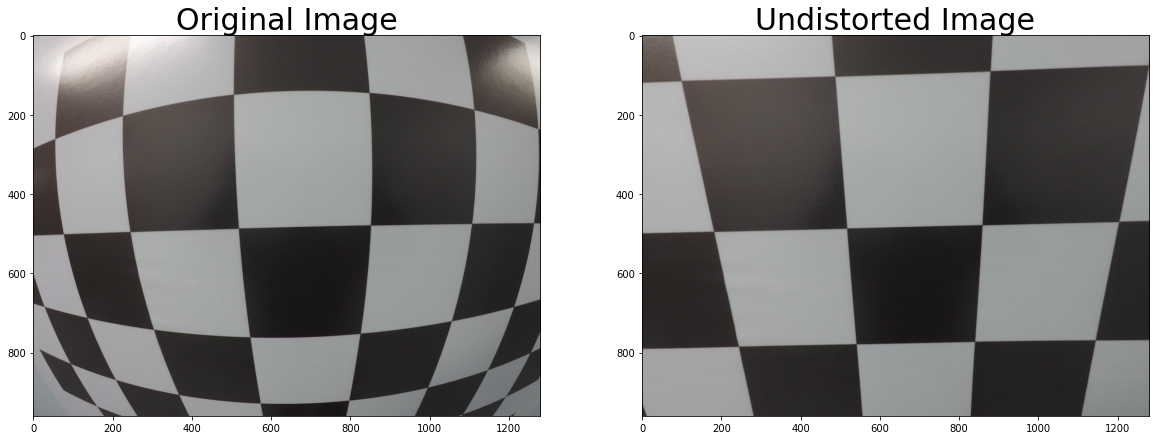

In [117]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('calibration_wide/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# Undistort and transform perspective

In [56]:
!rm pattern*.png* test_image*.png*
!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/files/Advanced_Lane_Finding_Images/correct_for_distortion/test_image2.png
!mv pattern.png test_image2.png
!ls

rm: pattern*.png*: No such file or directory
--2021-05-14 15:08:15--  https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/files/Advanced_Lane_Finding_Images/correct_for_distortion/test_image2.png
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.112
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373298 (365K) [image/png]
Saving to: ‘test_image2.png’

test_image2.png     100%[===================>] 364,55K   490KB/s    in 0,7s    

2021-05-14 15:08:16 (490 KB/s) - ‘test_image2.png’ saved [373298/373298]

mv: pattern.png: No such file or directory
LICENSE                  calibration_wide         test_image2.png
README.md                camera_calibration.ipynb


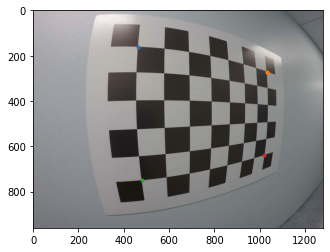

In [116]:
#import pickle
#import cv2
#import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "calibration_wide/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
# Read in an image
img = cv2.imread('test_image2.png')

ret, corners = cv2.findChessboardCorners(img, (nx, ny), None)
plt.plot(corners[0][0][0], corners[0][0][1], '.')
plt.plot(corners[nx-1][0][0], corners[nx-1][0][1], '.')
plt.plot(corners[-nx][0][0], corners[-nx][0][1], '.')
plt.plot(corners[-1][0][0], corners[-1][0][1], '.')
plt.imshow(img)

In [99]:
corners[0][0]

array([462.55078, 161.32762], dtype=float32)

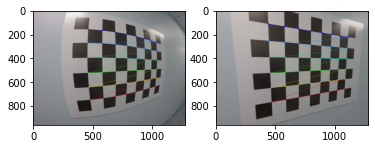

In [121]:
ret, corners = cv2.findChessboardCorners(img, (nx, ny), None)
#print(type(corners))
res = cv2.drawChessboardCorners(img, (nx, ny), None, ret)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
temp  = cv2.undistort(img, mtx, dist, None, mtx)
ax[1].imshow(temp)
plt.show()

In [111]:
!ls -l test_image2.png

-rw-r--r--  1 fra  staff  373298 Apr 20  2018 test_image2.png


True


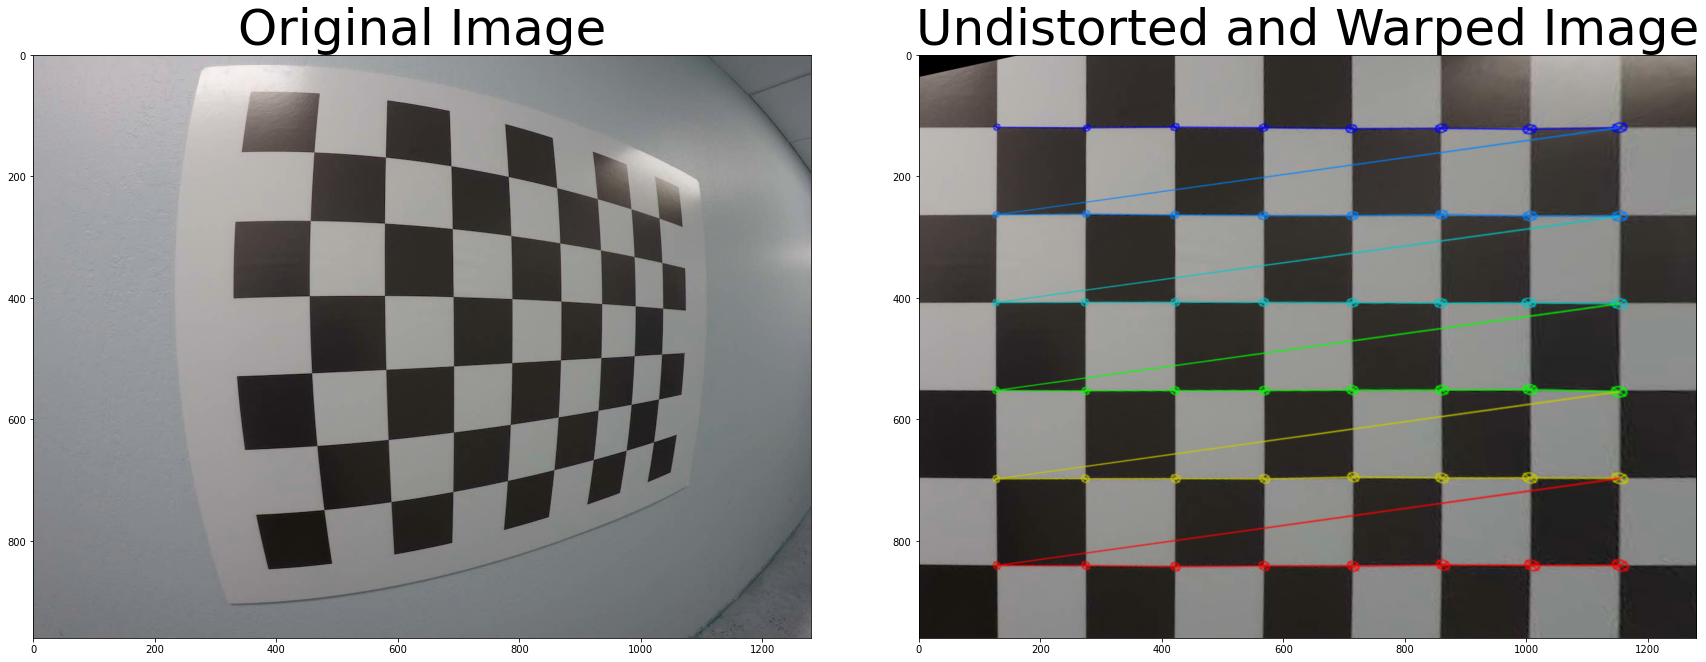

In [127]:
# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    img_size = (img.shape[1], img.shape[0])# warpPerspective wants a tuple not a list
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undst = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    undst_gray = cv2.cvtColor(undst, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(undst_gray, (nx, ny), None)
    # 4) If corners found: 
    #print(ret)

    M = None
    warped = None
    if ret:
        #print(corners)
        # a) draw corners
        res = cv2.drawChessboardCorners(undst, (nx, ny), corners, ret)
        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
        src = np.float32([corners[0],corners[nx-1],corners[-nx],corners[-1]])
        #Note: you could pick any four of the detected corners 
        # as long as those four corners define a rectangle
        #One especially smart way to do this would be to use four well-chosen
        # corners that were automatically detected during the undistortion steps
        #We recommend using the automatic detection of corners in your code
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        dst = np.float32([[int(1/(nx+2)*img.shape[1]), int(1/(ny+2)*img.shape[0])],
                          [int((nx+1)/(nx+2)*img.shape[1]), int(1/(ny+2)*img.shape[0])],
                          [int(1/(nx+2)*img.shape[1]), int((ny+1)/(ny+2)*img.shape[0])],
                          [int((nx+1)/(nx+2)*img.shape[1]), int((ny+1)/(ny+2)*img.shape[0])]])
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(undst, M, img_size, flags=cv2.INTER_LINEAR)
    #delete the next two lines

    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)